# Motif finding with iGraph

In [1]:
# Load relevant libraries
# Extensive documentation for iGraph here: http://igraph.org/r/doc/
suppressMessages(library(igraph))

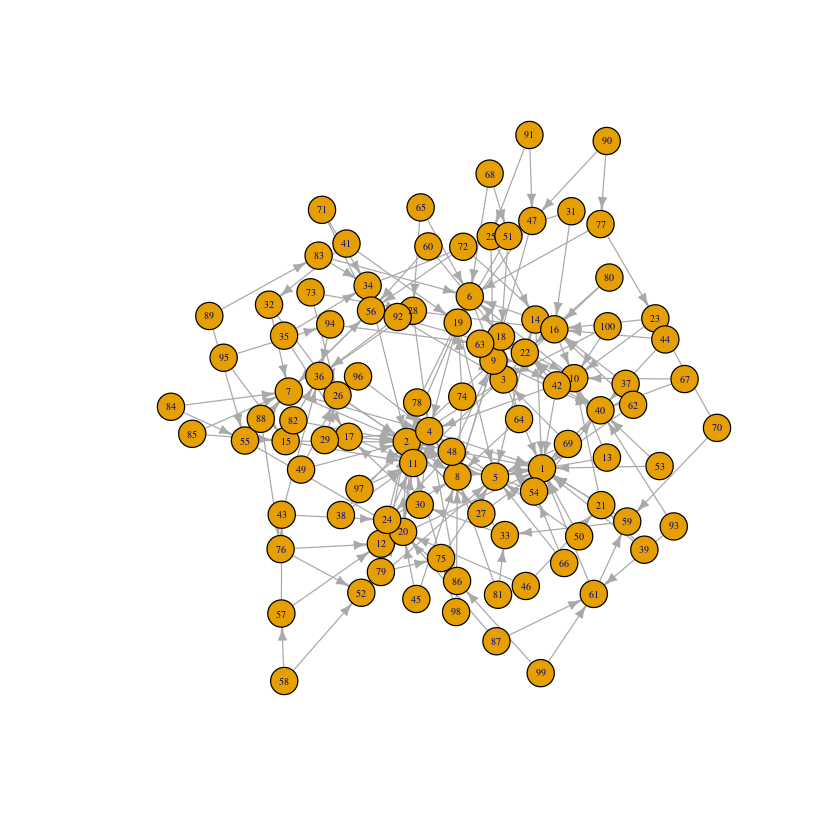

In [2]:
# Generate a graph 
# Args: Number of nodes, power paramater of preferential attachment function
# and number of edges to add at each iteration
test.graph<-barabasi.game(100,power=0.5,m=2)
plot(test.graph,
layout=layout.fruchterman.reingold,
vertex.size=10,         
vertex.label.cex=.5,    
edge.arrow.size=.5)

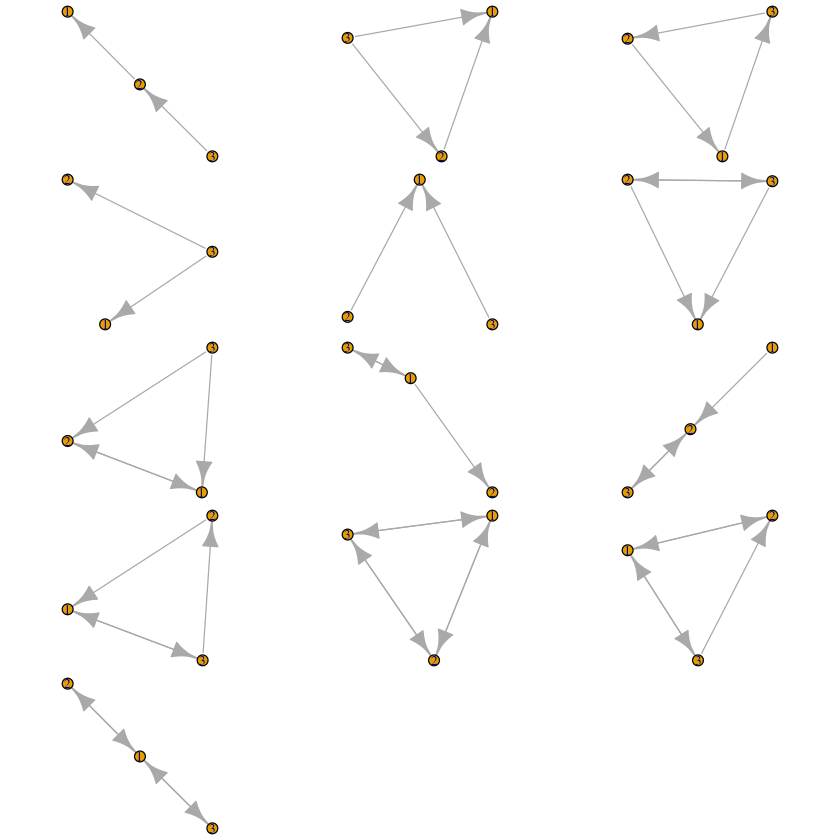

In [3]:
# Every graph can be decomposed into its component n-node subgraphs.
# In particular there are 13 unique ways to arrange 3 nodes in directed graphs.
# Here are the adjacency matrices for each of the 13 connected subgraphs
s1<-matrix(c(0,1,0,0,0,1,0,0,0),nrow=3,ncol=3)
s2<-matrix(c(0,1,1,0,0,1,0,0,0),nrow=3,ncol=3)
s3<-matrix(c(0,1,0,0,0,1,1,0,0),nrow=3,ncol=3)
s4<-matrix(c(0,0,1,0,0,1,0,0,0),nrow=3,ncol=3)
s5<-matrix(c(0,1,1,0,0,0,0,0,0),nrow=3,ncol=3)
d1<-matrix(c(0,1,1,0,0,1,0,1,0),nrow=3,ncol=3)
d2<-matrix(c(0,1,1,1,0,1,0,0,0),nrow=3,ncol=3)
d3<-matrix(c(0,0,1,1,0,0,1,0,0),nrow=3,ncol=3)
d4<-matrix(c(0,0,0,1,0,1,0,1,0),nrow=3,ncol=3)
d5<-matrix(c(0,1,1,0,0,1,1,0,0),nrow=3,ncol=3)
d6<-matrix(c(0,1,1,1,0,1,1,1,0),nrow=3,ncol=3)
d7<-matrix(c(0,1,1,1,0,1,1,0,0),nrow=3,ncol=3)
d8<-matrix(c(0,1,1,1,0,0,1,0,0),nrow=3,ncol=3)
 
# Make the 13 matrices into a list
subgraph3.mat<-list(s1,s2,s3,s4,s5,d1,d2,d3,d4,d5,d6,d7,d8)
# And convert the matrices into graph objects
subgraph3.graph<-lapply(subgraph3.mat,graph.adjacency)

# Here's what they look like
par(mar=c(0,0,0,0),mfrow=c(5,3))
plot.igraph(subgraph3.graph[[1]])
plot.igraph(subgraph3.graph[[2]])
plot.igraph(subgraph3.graph[[3]])
plot.igraph(subgraph3.graph[[4]])
plot.igraph(subgraph3.graph[[5]])
plot.igraph(subgraph3.graph[[6]])
plot.igraph(subgraph3.graph[[7]])
plot.igraph(subgraph3.graph[[8]])
plot.igraph(subgraph3.graph[[9]])
plot.igraph(subgraph3.graph[[10]])
plot.igraph(subgraph3.graph[[11]])
plot.igraph(subgraph3.graph[[12]])
plot.igraph(subgraph3.graph[[13]])

In [4]:
# Loop through the list of subgraphs and count how many times that subgraph appears in the larger test.graph
subgraph.count<-c()
for(i in 1:13){
subgraph.count[i]<- graph.count.subisomorphisms.vf2(test.graph, subgraph3.graph[[i]])
}
subgraph.count

# Note by default, barabasi.game does not create single edges with 2 arrows
# so any isomorphisms with a double arrow should have a count of 0

[1]  342   19    0  196 1292    0    0    0    0    0    0    0    0

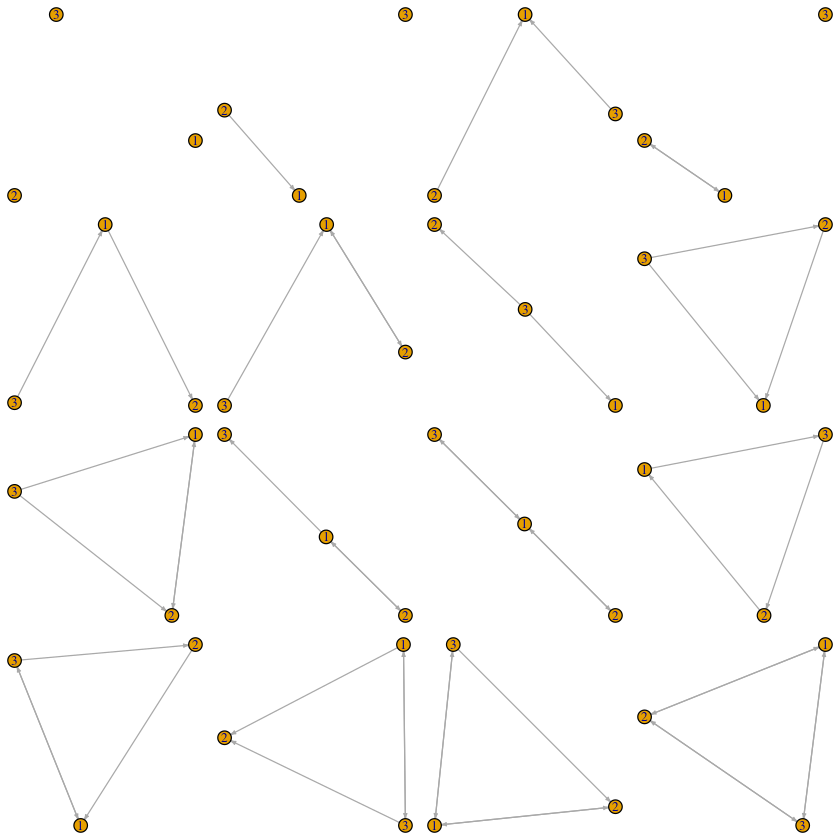

In [5]:
# If unconnected solutions are allowed, there are 16 was to create
# a 3 node directed graph
par(mar=c(0,0,0,0),mfrow=c(4,4))
plot.igraph(graph.isocreate(size=3,0,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,1,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,2,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,3,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,4,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,5,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,6,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,7,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,8,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,9,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,10,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,11,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,12,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,13,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,14,directed=T),edge.arrow.size=.2)
plot.igraph(graph.isocreate(size=3,15,directed=T),edge.arrow.size=.2)

In [6]:
# Compare the count_subgraph_isomorphisms function to the motifs function
motifs(test.graph,3)

subgraph.count<-c()
for(i in 1:16){
subgraph.count[i]<- count_subgraph_isomorphisms(graph.isocreate(size=3,i-1,directed=T),test.graph,method="VF2")
}
subgraph.count
# Note that the counts are significantly different!!

[1]  NA  NA 627  NA 323   0  79  19   0   0   0   0   0   0   0   0

[1] 970200  19306   1292      0    342      0    196     19      0      0
[11]      0      0      0      0      0      0

[1] NA NA  0 NA  0  0  0  0  0  0  0  0  0  0  0  1

[1] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6

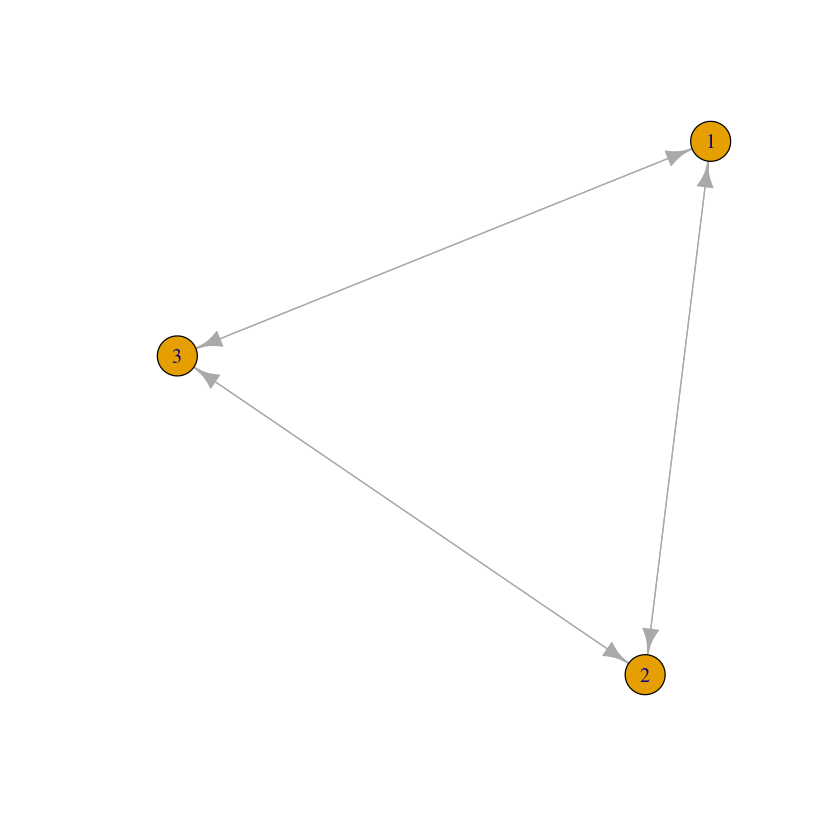

In [7]:
# What are these two functions doing differently? 
# Lets look at a simple example
g <- graph.formula(1+-+2,1+-+3,2+-+3)
plot(g)
motifs(g,3)

for(i in 1:16){
subgraph.count[i]<- count_subgraph_isomorphisms(graph.isocreate(size=3,i-1,directed=T),g,method="VF2")
}
subgraph.count

# Explanation: count_subgraph_isomorphisms considers all possible
# permutations of node order as different matches, whereas motifs
# will only count them once. In addition, count_subgraph_isomorphisms
# counts all the ways in which the nodes can be ordered ignoring
# the edges for the disconnected subisomorphims categories

[1] 6

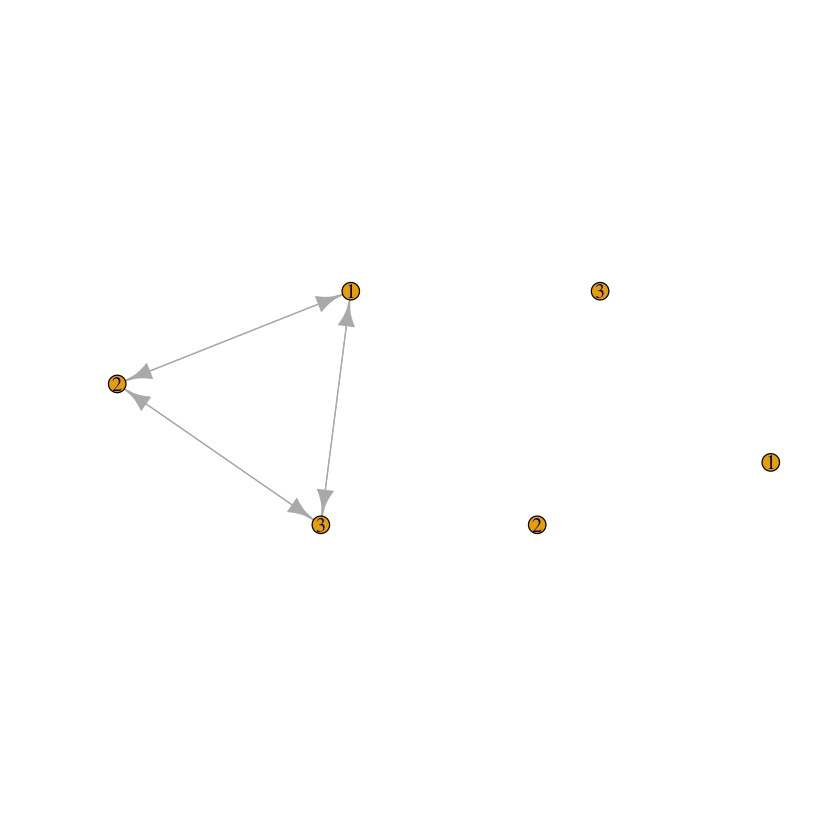

In [8]:
# count_subgraph_isomorphisms behavior for a disconnected isomorphism
gs <- graph.isocreate(size=3,0,directed=T)
par(mfrow=c(1,2))
plot(g)
plot(gs)
subgraph.count<-c()
count_subgraph_isomorphisms(gs,g,method="VF2")

[1] 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24

[1] 24 20 18 16 16 14 16 14 12 12 10 12 10 10  8  6

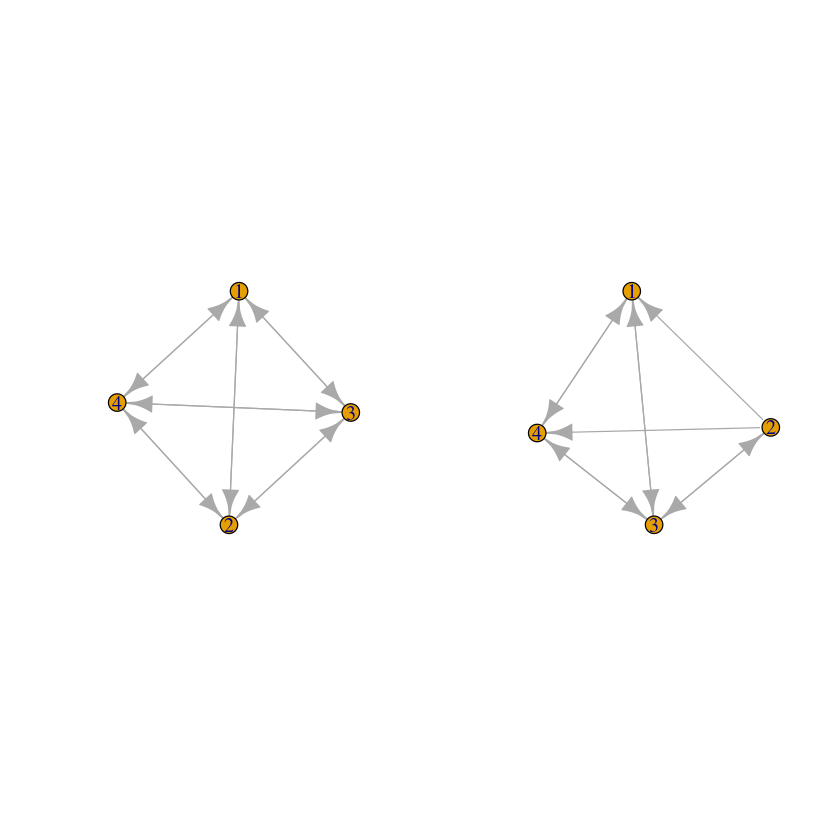

In [9]:
# Compare count_subgraph_isomorphisms on a complete directed
# graph versus an incomplete directed graph
g1 <- graph.formula(1+-+2,1+-+3,2+-+3,2+-+4,3+-+4,1+-+4)
g2 <- graph.formula(1+-2,1+-+3,2+-+3,2-+4,3+-+4,1+-+4)

par(mfrow=c(1,2))
plot(g1)
plot(g2)

subgraph.count1 <- c()
subgraph.count2 <- c()
for(i in 1:16){
subgraph.count1[i]<- count_subgraph_isomorphisms(graph.isocreate(size=3,i-1,directed=T),g1,method="VF2")
subgraph.count2[i]<- count_subgraph_isomorphisms(graph.isocreate(size=3,i-1,directed=T),g2,method="VF2")
}
subgraph.count1
subgraph.count2

[1] 24 24 24 24

[1] NA NA  0  4

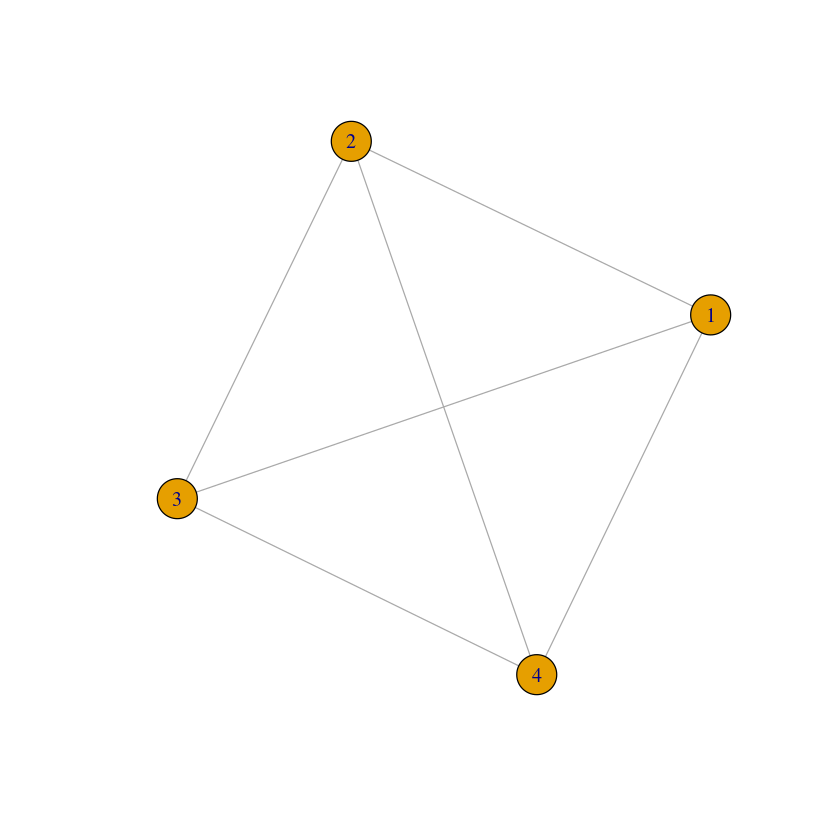

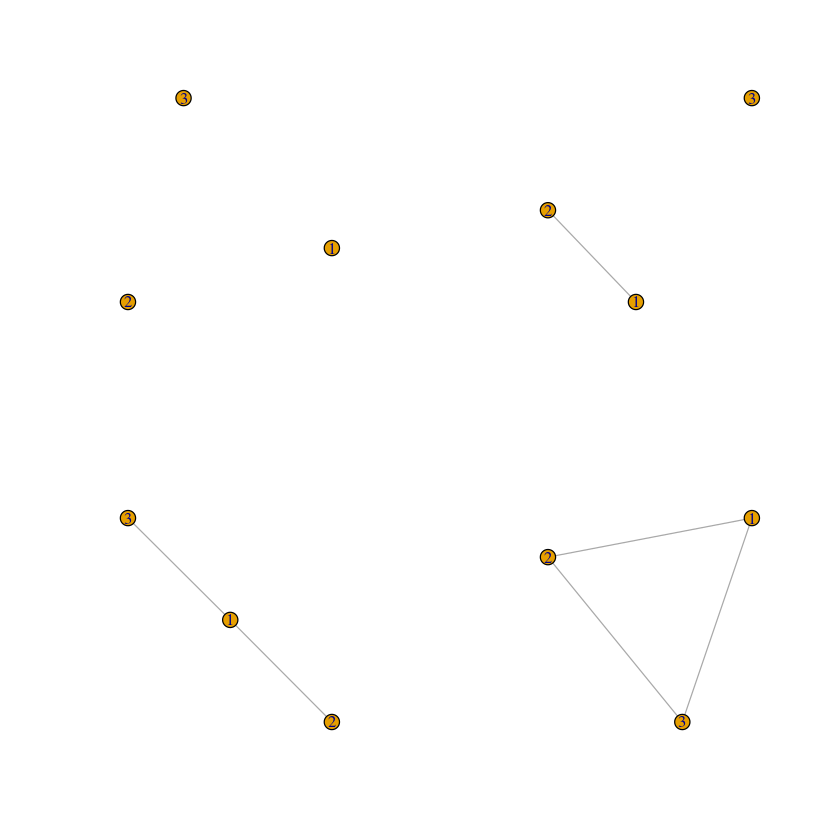

In [10]:
# For the undirected case
g <- graph.formula(1-2,1-3,2-3,2-4,3-4,1-4)
plot(g)

subgraph.count <- c()
for(i in 1:4){
subgraph.count[i]<- count_subgraph_isomorphisms(graph.isocreate(size=3,i-1,directed=F),g,method="VF2")
}
subgraph.count

motifs(g,3)

par(mfrow=c(2,2))
plot(graph.isocreate(size=3,0,directed=F))
plot(graph.isocreate(size=3,1,directed=F))
plot(graph.isocreate(size=3,2,directed=F))
plot(graph.isocreate(size=3,3,directed=F))